In [1]:
# Import necessary libraries
import os
import matplotlib.pyplot as plt
import cv2
from torchvision.transforms import ToTensor, Resize, Compose, Normalize
from torchvision.datasets import ImageFolder
import torch
from torch.utils.data import random_split, DataLoader
from torch import nn
from torch.optim import Adam
import time
from torchvision.models import vgg16

In [2]:
# Set data path to your Google Drive directory
data_path = "/content/drive/MyDrive/Ripe & Unripe Fruits"

In [3]:
# Print class names
for i in os.listdir(data_path):
 print(i)

unripe papaya
unripe pineapple
unripe strawberry
unripe dragon
unripe banana
unripe mango
unripe lemon
unripe orange
unripe grapes
unripe pomegranate
ripe dragon
ripe pomegranate
ripe mango
ripe lemon
ripe strawberry
ripe orange
ripe grapes
unripe apple
ripe papaya
ripe pineapple
ripe apple
ripe banana


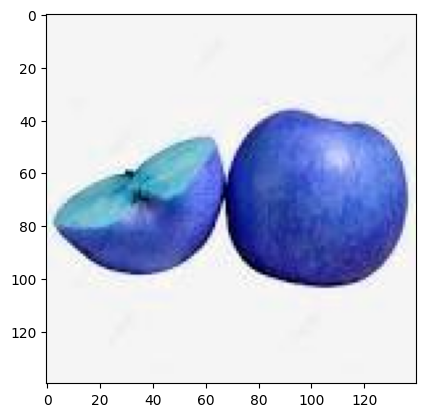

In [4]:
# Load and display an image
img_path = os.path.join(data_path, '/content/drive/MyDrive/Ripe & Unripe Fruits/ripe apple/10.jpg')
img = cv2.imread(img_path)
plt.imshow(img)

In [5]:
# Define data transformations
transfm = Compose([ToTensor(), Resize((98,98))])

In [6]:
# Calculate mean and standard deviation for image normalization
def get_mean_std(loader):
  num_pixels = 0
  mean = 0.0
  std = 0.0
  for images, _ in loader:
    batch_size, num_channels, height, width = images.shape
    num_pixels += batch_size * height * width
    mean += images.mean(axis=(0, 2, 3)).sum()
    std += images.std(axis=(0, 2, 3)).sum()

  mean /= num_pixels
  std /= num_pixels

  return mean,std

In [7]:
# Create dataset and dataloaders
dataset = ImageFolder(root=data_path, transform=transfm)

train_set, valid_set = torch.utils.data.random_split(dataset, [1600, 610])
train_loader = DataLoader(train_set, batch_size=4, shuffle=True)
test_loader = DataLoader(valid_set,batch_size=4)

In [ ]:

# Calculate mean and standard deviation for normalization
mean, std = get_mean_std(train_loader)
mean, std = get_mean_std(test_loader)

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [ ]:
pip install torchvision

In [ ]:
# Load VGG16 model
model = vgg16(pretrained=True)

In [ ]:
# Replace final classifier with a 22-class classifier
model.classifier[6] = nn.Linear(4096, 22)

In [ ]:
# Move model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
clf = model.to(device)

In [ ]:
opt=Adam(clf.parameters(),lr=1e-5)
loss_fn=nn.CrossEntropyLoss()

In [ ]:
# Train the model for 10 epochs
start_time = time.time()
for epoch in range(10):
  running_loss = 0.0
  for X, y in train_loader:
    X, y = X.to(device), y.to(device)
    yhat = model(X)
    loss = loss_fn(yhat, y)
    opt.zero_grad()
    loss.backward()
    opt.step()
    running_loss += loss.item() * X.size(0)

  epoch_loss = running_loss / len(dataset)
  print(f"Epoch {epoch+1} loss: {epoch_loss:.4f}")

In [ ]:
# Evaluate the model on the test set
correct = 0
total = 0

with torch.no_grad():
  for data in test_loader:
    images, labels = data
    images, labels = images.to(device), labels.to(device)
    outputs = clf(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print(f'Accuracy of the network: {100 * correct // total} %')

In [ ]:
from flask import Flask
app = Flask(_name_)

In [ ]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)